In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt #Library untuk visualisasi
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [ ]:
# Load Data
df = pd.read_csv('/content/IBM HR Analytics Employee Attrition & Performance.csv')
print("Dataset berhasil dimuat! Ukuran data :", df.shape)

Dataset berhasil dimuat! Ukuran data : (1470, 35)


# **Profiling Data**

In [ ]:
# Profiling Data Awal
print("INFO DATASET:")
df.info()
print("\nSTATISTIK DESKRIPTIF:")
df.describe()

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel  

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Melihat statistik dasar dari kolom-kolom kategorikal
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# **Data Preparation**

In [ ]:
# Diagnosis - Cek Missing Values

missing_data = df.isnull().sum()

print(" JUMLAH MISSING VALUES PER KOLOM:")
print("-" * 50)
print(missing_data)

 JUMLAH MISSING VALUES PER KOLOM:
--------------------------------------------------
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance

In [ ]:
# Cek apakah ada baris duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Jika ingin lihat data yang duplikat
if duplicate_count > 0:
    print(df[df.duplicated()])
else:
    print("✅ Tidak ada data duplikat.")


Jumlah data duplikat: 0
✅ Tidak ada data duplikat.


=== Statistik Deskriptif Dataset ===
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932

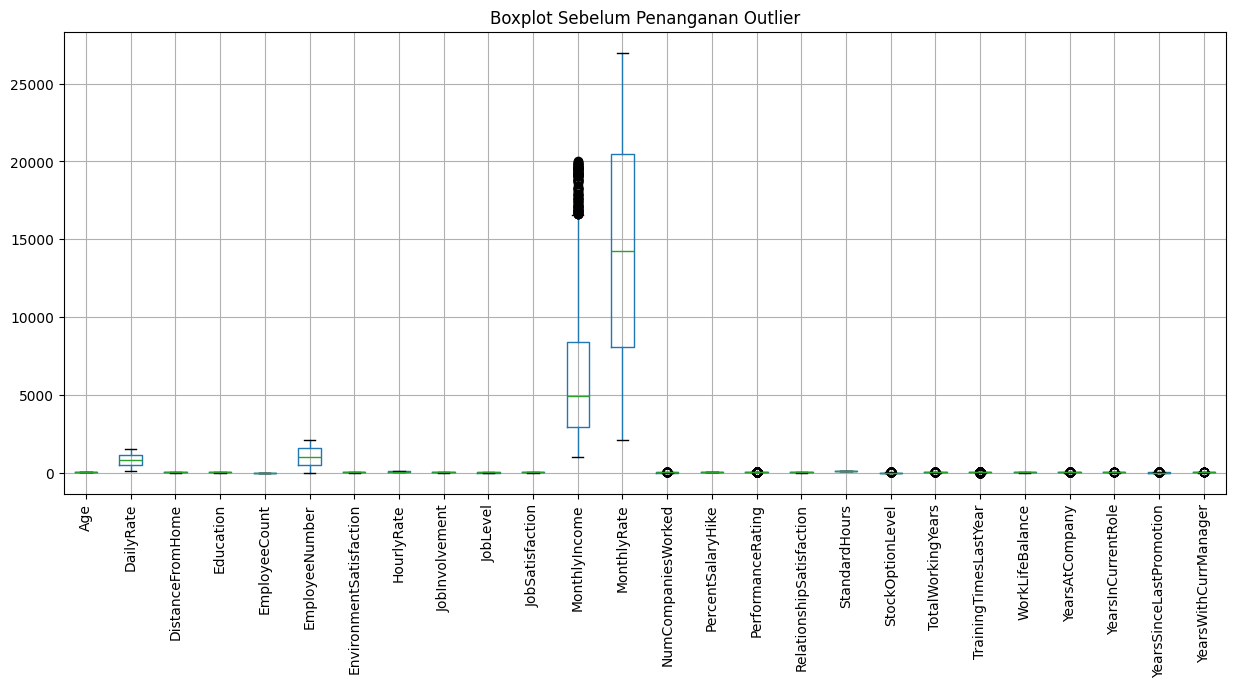

In [ ]:
# Diagnosis - Cek Outlier

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns #mengambil kolom numerik bertipe integer dan pecahan
print("=== Statistik Deskriptif Dataset ===")
print(df[numeric_cols].describe()) #menghitung statistik deskriptif (count, mean, std, min, 25%, 50%, 75%, dan max)

numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Jumlah Outlier'])
outlier_df = outlier_df[outlier_df['Jumlah Outlier'] > 0].sort_values(by='Jumlah Outlier', ascending=False)

print("🔹 CEK OUTLIER (metode IQR):")
if outlier_df.empty:
    print("✅ Tidak ada outlier signifikan (atau semua dalam rentang normal).")
else:
    print(outlier_df)

plt.figure(figsize=(15,6))
df[numeric_cols].boxplot() #visualisasi boxplot
plt.xticks(rotation=90)
plt.title("Boxplot Sebelum Penanganan Outlier")
plt.show()


Dataset awal: (1470, 35)
Dataset setelah outlier ditangani: (699, 35)


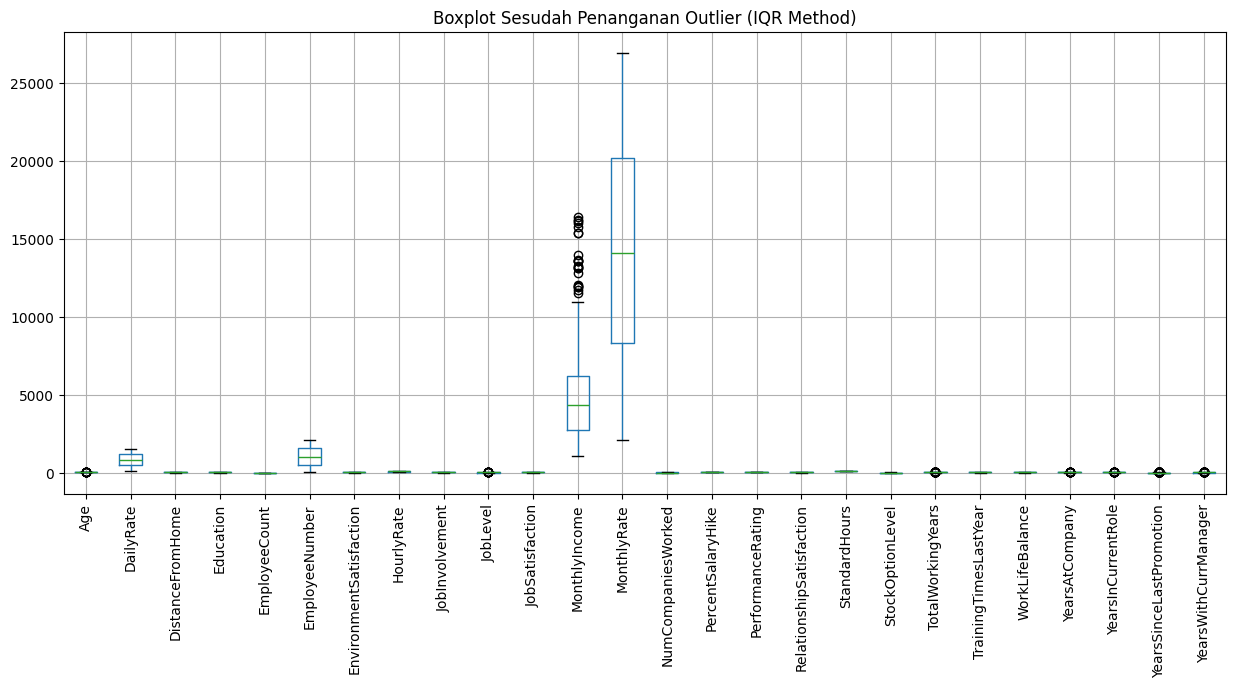

In [ ]:
# Penanganan Outlier

df_clean = df.copy() #membuat salinan dataset
for col in numeric_cols: #looping untuk setiap kolom numerik yang sudah disimpan dalam numeric_cols
    Q1 = df_clean[col].quantile(0.25) #menghitung Q1
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1 #IQR untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)] #list data yang benar/bersih dan baru

print("\nDataset awal:", df.shape)
print("Dataset setelah outlier ditangani:", df_clean.shape)

plt.figure(figsize=(15,6))
df_clean[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot Sesudah Penanganan Outlier (IQR Method)")
plt.show()

In [ ]:
# Cek nilai unik pada kolom kategorikal (untuk deteksi inkonsistensi)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())



Kolom: Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Kolom: BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Kolom: Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Kolom: EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Kolom: Gender
Gender
Male      882
Female    588
Name: count, dtype: int64

Kolom: JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Ko

In [ ]:
# penanganan inkonsistensi
# Normalisasi huruf & hapus spasi
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.title()

# Perbaikan spesifik jika ada nilai aneh
df['OverTime'] = df['OverTime'].replace({'Y': 'Yes', 'N': 'No'})
df['Attrition'] = df['Attrition'].replace({'Y': 'Yes', 'N': 'No'})

# Pastikan tidak ada kapitalisasi ganda lagi
for col in cat_cols:
    print(f"\nNilai unik setelah normalisasi di kolom {col}:")
    print(df[col].unique())



Nilai unik setelah normalisasi di kolom Attrition:
['Yes' 'No']

Nilai unik setelah normalisasi di kolom BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Nilai unik setelah normalisasi di kolom Department:
['Sales' 'Research & Development' 'Human Resources']

Nilai unik setelah normalisasi di kolom EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Nilai unik setelah normalisasi di kolom Gender:
['Female' 'Male']

Nilai unik setelah normalisasi di kolom JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Nilai unik setelah normalisasi di kolom MaritalStatus:
['Single' 'Married' 'Divorced']

Nilai unik setelah normalisasi di kolom Over18:
['Y']

Nilai unik setelah normalisasi di kolom OverTime:
['Yes' 'No']


# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Visualisasi

1. Apakah jam lembur (OverTime) berpengaruh terhadap tingkat attrition karyawan?

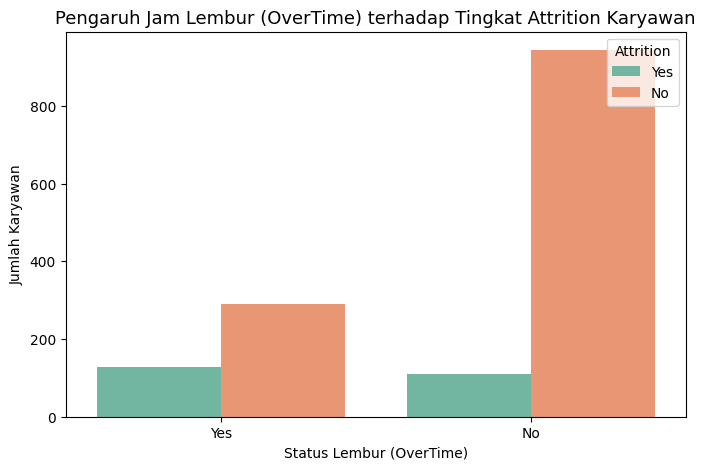

In [ ]:
# Normalisasi huruf biar bersih
df['OverTime'] = df['OverTime'].str.strip().str.title()
df['Attrition'] = df['Attrition'].str.strip().str.title()

# Plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')

# Judul & label
plt.title('Pengaruh Jam Lembur (OverTime) terhadap Tingkat Attrition Karyawan', fontsize=13)
plt.xlabel('Status Lembur (OverTime)')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', loc='upper right')

plt.show()




Interpretasi:

Karyawan yang sering lembur (“OverTime = Yes”) lebih banyak keluar (Attrition = Yes) dibandingkan yang tidak lembur. Ini menunjukkan jam kerja berlebih bisa meningkatkan risiko resign.

2. Bagaimana hubungan antara pendapatan bulanan (Monthly Income) dengan tingkat attrition

/tmp/ipython-input-3956818525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set2')


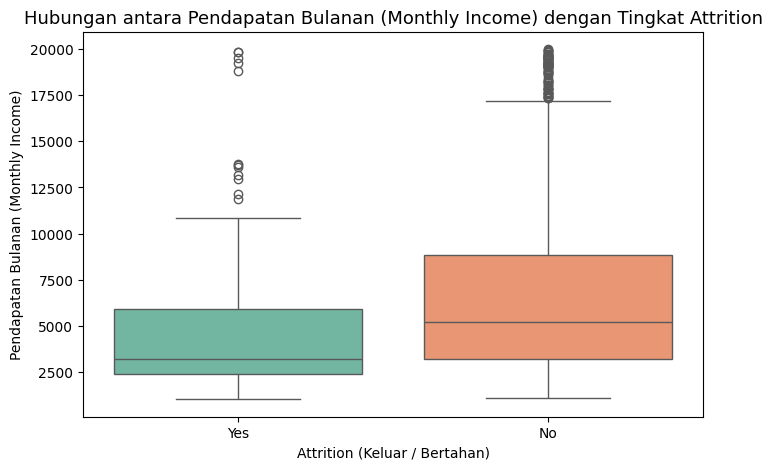

In [ ]:
# Normalisasi huruf pada kolom kategorikal
df['Attrition'] = df['Attrition'].str.strip().str.title()

# Plot Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set2')

# Judul dan label
plt.title('Hubungan antara Pendapatan Bulanan (Monthly Income) dengan Tingkat Attrition', fontsize=13)
plt.xlabel('Attrition (Keluar / Bertahan)')
plt.ylabel('Pendapatan Bulanan (Monthly Income)')
plt.show()

Karyawan dengan pendapatan bulanan rendah lebih cenderung keluar dari perusahaan.
Artinya, faktor kompensasi memiliki pengaruh signifikan terhadap retensi karyawan.

3. Apakah gaji dan lama kerja seorang karyawan dapat mempengaruhi tingkat resign pada sebuah perusahaan ?


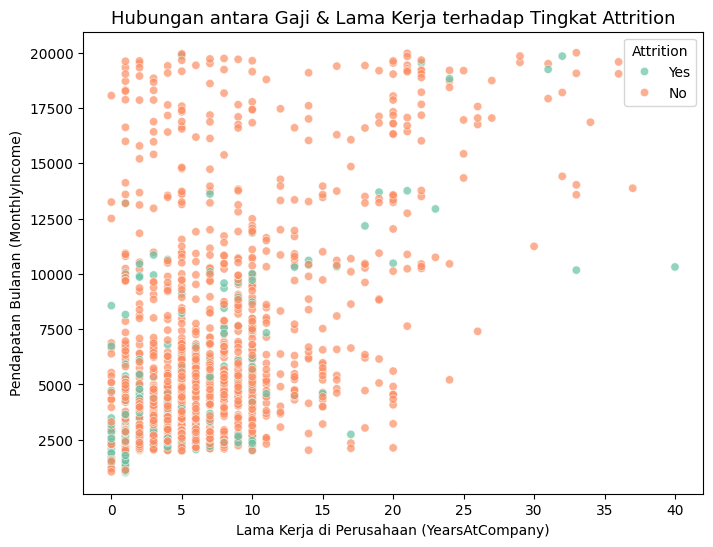

In [ ]:
# Bersihkan kolom kategorikal (hindari huruf acak)
df['Attrition'] = df['Attrition'].str.strip().str.title()

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='YearsAtCompany',
    y='MonthlyIncome',
    hue='Attrition',
    palette='Set2',
    alpha=0.7
)

# Judul dan label
plt.title('Hubungan antara Gaji & Lama Kerja terhadap Tingkat Attrition', fontsize=13)
plt.xlabel('Lama Kerja di Perusahaan (YearsAtCompany)')
plt.ylabel('Pendapatan Bulanan (MonthlyIncome)')
plt.legend(title='Attrition')
plt.show()

Karyawan yang baru bergabung (YearsAtCompany rendah) dan berpenghasilan kecil (MonthlyIncome rendah) memiliki proporsi attrition (resign) lebih tinggi. Sementara karyawan yang lama bekerja dan berpenghasilan lebih tinggi cenderung bertahan.

Gaji dan lama kerja sama-sama berpengaruh terhadap keputusan resign —
semakin tinggi gaji dan semakin lama bekerja, semakin rendah kemungkinan karyawan keluar.

Bagaimana hubungan antara WorkLifeBalance dengan attrition?

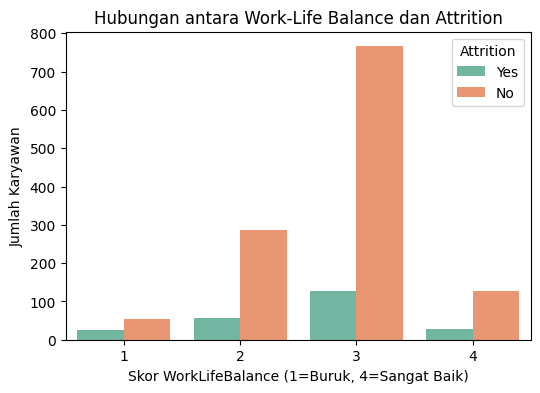

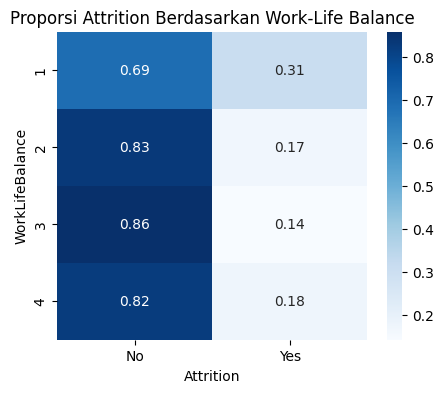

In [ ]:
# Rapikan kolom Attrition (hindari perbedaan huruf besar/kecil)
df['Attrition'] = df['Attrition'].str.strip().str.title()

# 1️⃣ Countplot sederhana
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='Set2')
plt.title('Hubungan antara Work-Life Balance dan Attrition')
plt.xlabel('Skor WorkLifeBalance (1=Buruk, 4=Sangat Baik)')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition')
plt.show()

# 2️⃣ Heatmap proporsi (opsional, untuk memperjelas)
cross = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index')
plt.figure(figsize=(5,4))
sns.heatmap(cross, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proporsi Attrition Berdasarkan Work-Life Balance')
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.show()

Semakin buruk WorkLifeBalance, semakin tinggi kemungkinan karyawan keluar dari perusahaan.

Bagaimana profil karyawan yang cenderung keluar dibandingkan yang bertahan?

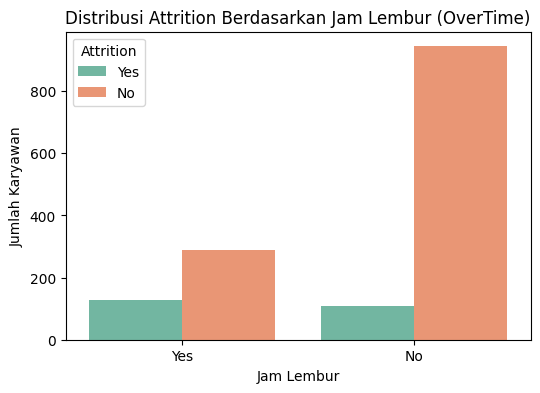

/tmp/ipython-input-3933697731.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')


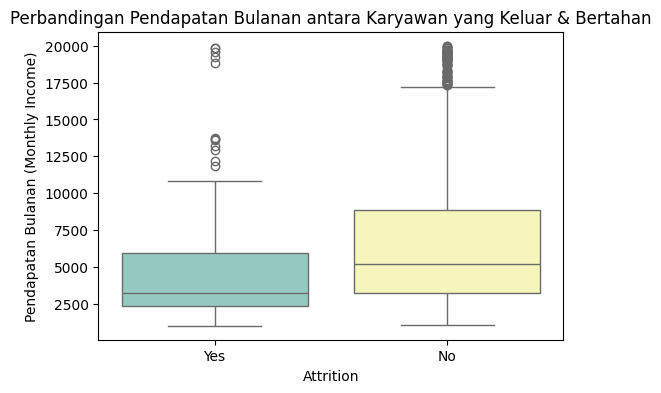

/tmp/ipython-input-3933697731.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette='Set2')


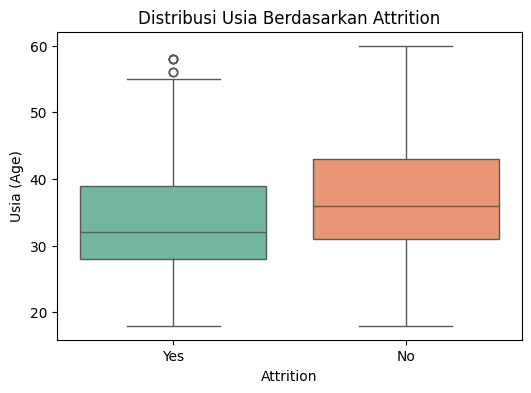

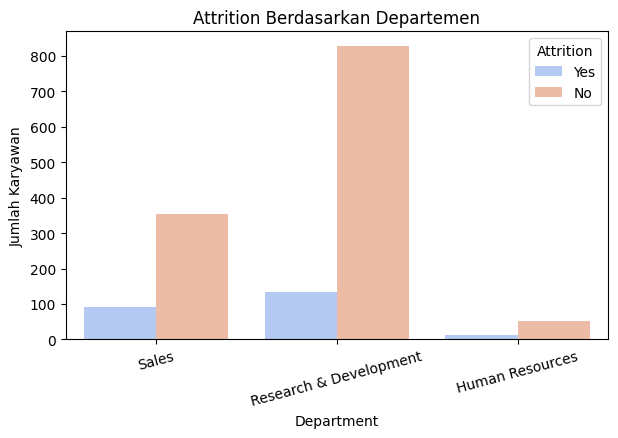

In [ ]:


# Pastikan kolom Attrition bersih
df['Attrition'] = df['Attrition'].str.strip().str.title()

# 1️⃣ Distribusi Attrition berdasarkan OverTime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('Distribusi Attrition Berdasarkan Jam Lembur (OverTime)')
plt.xlabel('Jam Lembur')
plt.ylabel('Jumlah Karyawan')
plt.show()

# 2️⃣ Rata-rata pendapatan berdasarkan status Attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title('Perbandingan Pendapatan Bulanan antara Karyawan yang Keluar & Bertahan')
plt.xlabel('Attrition')
plt.ylabel('Pendapatan Bulanan (Monthly Income)')
plt.show()

# 3️⃣ Usia karyawan terhadap status Attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='Age', palette='Set2')
plt.title('Distribusi Usia Berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Usia (Age)')
plt.show()

# 4️⃣ Attrition berdasarkan Departemen
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Department', hue='Attrition', palette='coolwarm')
plt.title('Attrition Berdasarkan Departemen')
plt.xlabel('Department')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=15)
plt.show()


Profil karyawan yang cenderung keluar adalah mereka yang:
masih muda, gajinya rendah, masa kerja pendek, sering lembur, dan memiliki work-life balance buruk.

Dengan kata lain, ketidakpuasan awal dan beban kerja tinggi menjadi faktor dominan yang meningkatkan risiko resign.

# **Uji Statistik**

# Pertanyaan 1

1. Apakah jam lembur (OverTime) berpengaruh terhadap tingkat attrition karyawan?

Hipotesis:

H₀: Tidak ada hubungan antara jam lembur dengan tingkat attrition.

H₁: Ada hubungan antara jam lembur dengan tingkat attrition.

Chi-Square Statistic: 87.56429365828768
p-value: 8.15842372153832e-21
❌ Tolak H0 → Ada hubungan signifikan antara lembur dan attrition.


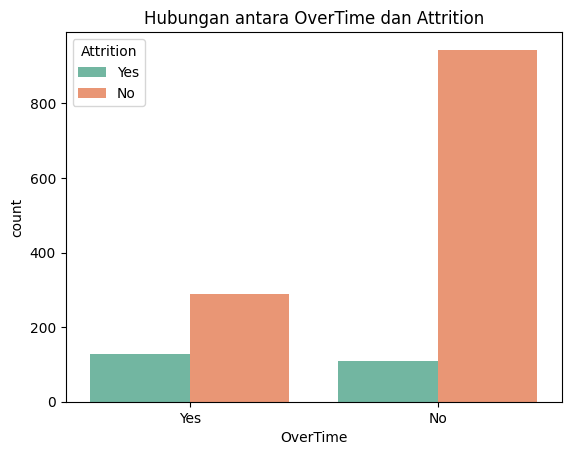

In [ ]:
# Crosstab
ct = pd.crosstab(df['OverTime'], df['Attrition'])

# Uji Chi-square
chi2_stat, p, dof, expected = chi2_contingency(ct)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p)
if p < 0.05:
    print("❌ Tolak H0 → Ada hubungan signifikan antara lembur dan attrition.")
else:
    print("✅ Gagal tolak H0 → Tidak ada hubungan signifikan.")

sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('Hubungan antara OverTime dan Attrition')
plt.show()


insight

# Pertanyaan 2

2. Apakah pendapatan bulanan berpengaruh terhadap tingkat attrition?

Hipotesis:

H₀: Tidak ada perbedaan rata-rata pendapatan antara karyawan yang keluar dan yang bertahan.

H₁: Ada perbedaan rata-rata pendapatan antara kedua kelompok tersebut.

t-statistic: -7.482621586644742
p-value: 4.433588628286071e-13
❌ Tolak H0 → Ada perbedaan signifikan pendapatan antara yang keluar & bertahan.


/tmp/ipython-input-3587156693.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')


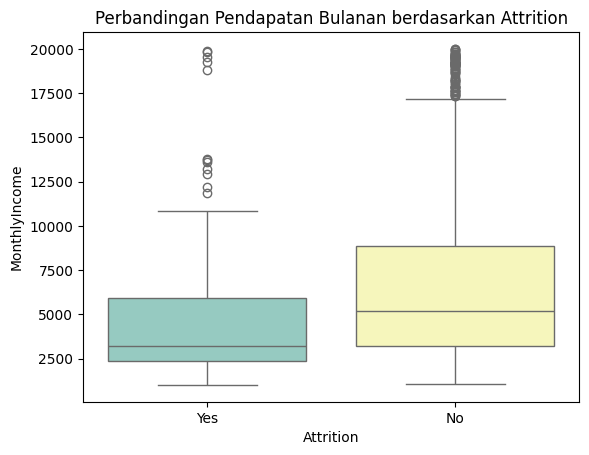

In [ ]:
# Pisahkan data berdasarkan attrition
income_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Uji t-test
t_stat, p = ttest_ind(income_yes, income_no, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p)
if p < 0.05:
    print("❌ Tolak H0 → Ada perbedaan signifikan pendapatan antara yang keluar & bertahan.")
else:
    print("✅ Gagal tolak H0 → Tidak ada perbedaan signifikan pendapatan.")

sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title('Perbandingan Pendapatan Bulanan berdasarkan Attrition')
plt.show()


insight

# Pertanyaan 3

3. Apakah gaji dan lama kerja berpengaruh terhadap kemungkinan resign?

Hipotesis:

H₀: Gaji dan lama kerja tidak berpengaruh signifikan terhadap keputusan resign.

H₁: Gaji dan/atau lama kerja berpengaruh signifikan terhadap keputusan resign.

Optimization terminated successfully.
         Current function value: 0.423553
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_num   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1467
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Dec 2025   Pseudo R-squ.:                 0.04107
Time:                        20:25:19   Log-Likelihood:                -622.62
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.617e-12
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8010      0.138     -5.811      0.000      -1.071      -0.531
MonthlyIncome  -9

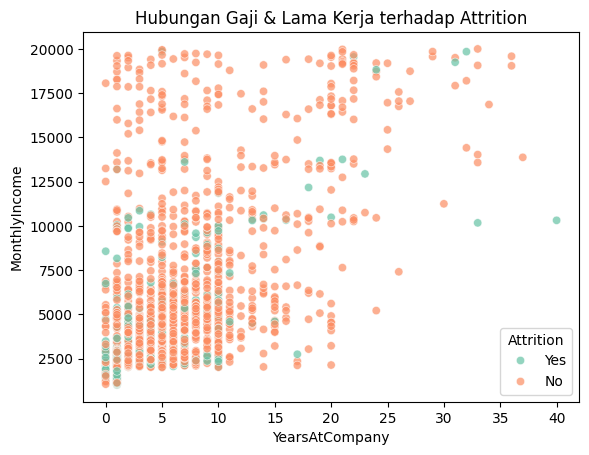

In [ ]:
# Ubah Attrition ke bentuk numerik
df['Attrition_num'] = df['Attrition'].map({'Yes':1, 'No':0})

# Variabel independen dan dependen
X = df[['MonthlyIncome', 'YearsAtCompany']]
y = df['Attrition_num']

# Tambahkan konstanta
X = sm.add_constant(X)

# Model regresi logistik
model = sm.Logit(y, X).fit()
print(model.summary())

# Interpretasi
p_values = model.pvalues
if (p_values < 0.05).any():
    print("❌ Tolak H0 → Ada pengaruh signifikan dari gaji/masa kerja terhadap attrition.")
else:
    print("✅ Gagal tolak H0 → Tidak ada pengaruh signifikan.")

sns.scatterplot(data=df, x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', palette='Set2', alpha=0.7)
plt.title('Hubungan Gaji & Lama Kerja terhadap Attrition')
plt.show()


insight

# Pertanyaan 4

4. Apakah WorkLifeBalance berhubungan dengan tingkat attrition?

Hipotesis:

H₀: Tidak ada hubungan antara WorkLifeBalance dan Attrition.

H₁: Ada hubungan antara WorkLifeBalance dan Attrition.

Chi-Square Statistic: 16.3250970916474
p-value: 0.0009725698845348824
❌ Tolak H0 → Ada hubungan signifikan antara WorkLifeBalance dan Attrition.


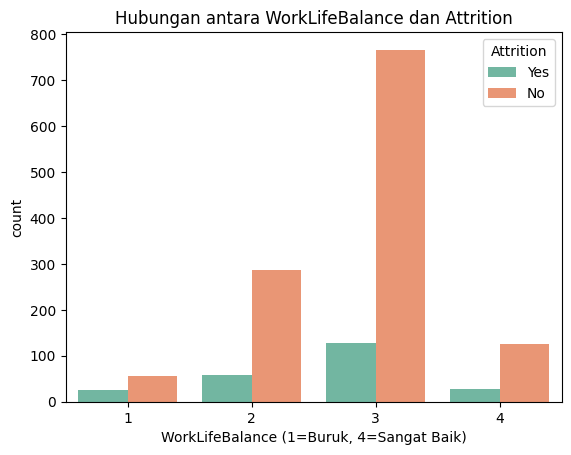

In [ ]:
ct = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
chi2_stat, p, dof, expected = chi2_contingency(ct)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p)
if p < 0.05:
    print("❌ Tolak H0 → Ada hubungan signifikan antara WorkLifeBalance dan Attrition.")
else:
    print("✅ Gagal tolak H0 → Tidak ada hubungan signifikan.")

sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='Set2')
plt.title('Hubungan antara WorkLifeBalance dan Attrition')
plt.xlabel('WorkLifeBalance (1=Buruk, 4=Sangat Baik)')
plt.show()


insight

# Pertanyaan 5

5. Bagaimana profil karyawan yang cenderung keluar dibandingkan yang bertahan?

Hipotesis (beberapa variabel):

H₀₁: Tidak ada perbedaan rata-rata usia antara yang keluar dan bertahan.

H₀₂: Tidak ada hubungan antara OverTime dan Attrition.

H₀₃: Tidak ada perbedaan rata-rata YearsAtCompany antara keduanya.

In [ ]:
# Usia (numerik)
t_stat_age, p_age = ttest_ind(df[df['Attrition']=='Yes']['Age'], df[df['Attrition']=='No']['Age'])
# OverTime (kategori)
ct = pd.crosstab(df['OverTime'], df['Attrition'])
chi2_stat, p_ot, dof, expected = chi2_contingency(ct)
# Lama kerja
t_stat_yrs, p_yrs = ttest_ind(df[df['Attrition']=='Yes']['YearsAtCompany'], df[df['Attrition']=='No']['YearsAtCompany'])

print("Age p-value:", p_age)
print("OverTime p-value:", p_ot)
print("YearsAtCompany p-value:", p_yrs)


Age p-value: 8.356308021103587e-10
OverTime p-value: 8.15842372153832e-21
YearsAtCompany p-value: 2.3188716103863036e-07


✅ X shape: (1470, 44) | y shape: (1470,)
'Attrition' in X.columns? False
'Attrition_num' in X.columns? False

=== 📊 CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

Tidak Resign       0.85      0.97      0.91       247
      Resign       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294


✅ ROC-AUC Score: 0.7843


/tmp/ipython-input-1934743308.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


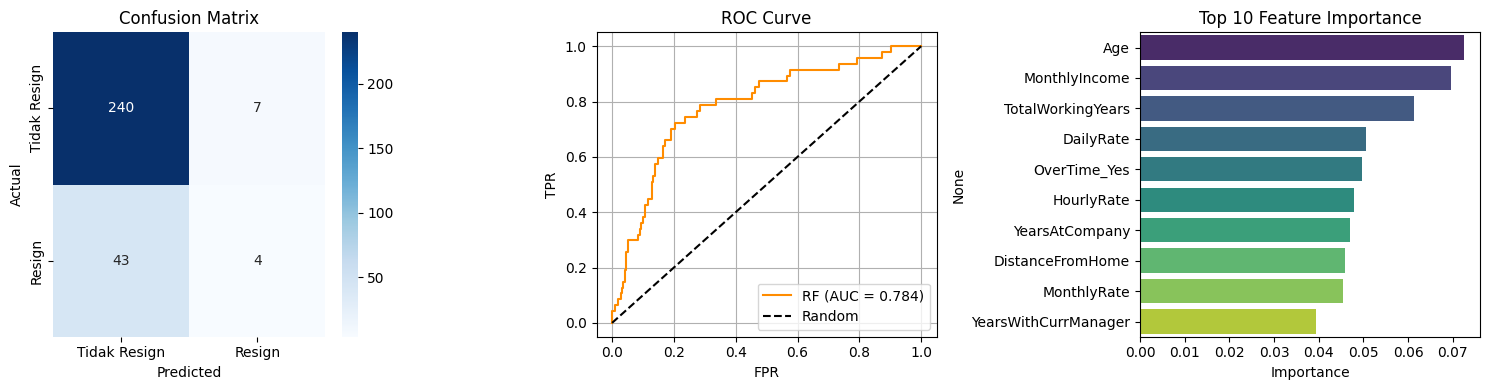


=== 🔑 Top 5 Features ===
Age                  0.072459
MonthlyIncome        0.069503
TotalWorkingYears    0.061378
DailyRate            0.050676
OverTime_Yes         0.049770
dtype: float64


In [ ]:
# =============================================
# Task: Prediksi Attrition (Yes/No) → supervised learning classification
# =============================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Encode target secara terpisah
y = (df['Attrition'] == 'Yes').astype(int)  # Yes=1, No=0

# Siapkan X: HANYA fitur — drop semua kolom target/redundan
X = df.drop([
    'Attrition',
    'Attrition_num',        # ❗ pastikan ini di-drop!
    'EmployeeCount',
    'EmployeeNumber',
    'Over18',
    'StandardHours'
], axis=1, errors='ignore')  # errors='ignore' agar tidak error jika kolom tidak ada

# Encoding kategorikal
X = pd.get_dummies(X, drop_first=True)

# 🔍 Verifikasi
print(f"✅ X shape: {X.shape} | y shape: {y.shape}")
print(f"'Attrition' in X.columns? {'Attrition' in X.columns}")
print(f"'Attrition_num' in X.columns? {'Attrition_num' in X.columns}")

# Split data — STRATIFIED untuk kelas minoritas (Resign)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluasi
print("\n=== 📊 CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Tidak Resign', 'Resign']))

auc = roc_auc_score(y_test, y_proba)
print(f"\n✅ ROC-AUC Score: {auc:.4f}")

# Visualisasi (3-in-1)
plt.figure(figsize=(15, 4))

# 1. Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Resign', 'Resign'], yticklabels=['Tidak Resign', 'Resign'])
plt.title('Confusion Matrix'); plt.ylabel('Actual'); plt.xlabel('Predicted')

# 2. ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'RF (AUC = {auc:.3f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.title('ROC Curve'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.grid(True)

# 3. Feature Importance (Top 10)
plt.subplot(1, 3, 3)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Top 10 Feature Importance'); plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# Cetak Top 5 Features
print("\n=== 🔑 Top 5 Features ===")
print(importances.head(5))

insight